In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris #仅用于加载数据集


In [20]:
# 画图时的中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [21]:
# 加载数据集
iris = load_iris()


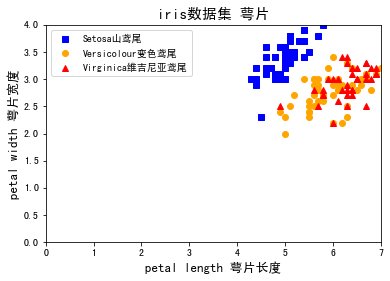

In [26]:
# 从图中大致可以看出，花瓣长度和花瓣宽度与鸢尾花类型间有较好的线性关系，使用花瓣数据来划分鸢尾花类型效果更好。
X=np.c_[np.ones(100),iris.data[:100,2:4]]
data = np.vstack((iris.data[:50, 2:4],iris.data[100:150, 2:4]))
print(data)
print("-----------")
print(iris.data[100:150, 2:4])
# 得到真值T，从数据集中得到真值
T=iris.target[:100].reshape(100,1)

# 将T中所有不等于1的元素赋值为-1，以契合sign函数
T[T!=1] = -1


# 权值初始化，3行1列，即w0 w1 w2
# 直接赋初值，不使用随机数
W = np.array([[1],
              [1],
              [1]])

# 学习率设置
lr = 1
# 神经网络输出
Y = 0

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [6.  2.5]
 [5.1 1.9]
 [5.9 2.1]
 [5.6 1.8]
 [5.8 2.2]
 [6.6 2.1]
 [4.5 1.7]
 [6.3 1.8]
 [5.8 1.8]
 [6.1 2.5]
 [5.1 2. ]
 [5.3 1.9]
 [5.5 2.1]
 [5.  2. ]
 [5.1 2.4]
 [5.3 2.3]
 [5.5 1.8]
 [6.7 2.2]
 [6.9 2.3]
 [5.  1.5]
 [5.7 2.3]
 [4.9 2. ]
 [6.7 2. ]
 [4.9 1.8]
 [5.7 2.1]
 [6.  1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.6 2.1]
 [5.8 1.6]
 [6.1 1.9]
 [6.4 2. ]
 [5.6 2.2]
 [5.1 1.5]
 [5.6 1.4]
 [6.1 2.3]
 [5.6 2.4]
 [5.5 1.8]
 [4.8 1.8]
 [5.4 2.1]
 [5.6 2.4]

In [34]:
print(iris.target[:100])
print("----------")
print(np.hstack((iris.target[:50],iris.target[100:150])))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
----------
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2]


C:\Users\12591\AppData\Local\Temp/ipykernel_15932/2423548786.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[:50, 1], X[:50, 2], 'bo', color='red', label='Setosa山鸢尾')
C:\Users\12591\AppData\Local\Temp/ipykernel_15932/2423548786.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[50:100, 1], X[50:100, 2], 'bo', color='blue', label='Versicolour变色鸢尾')
C:\Users\12591\AppData\Local\Temp/ipykernel_15932/2423548786.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  plt.plot(2.5, 1, 'b+', color='black', label='待预测点')


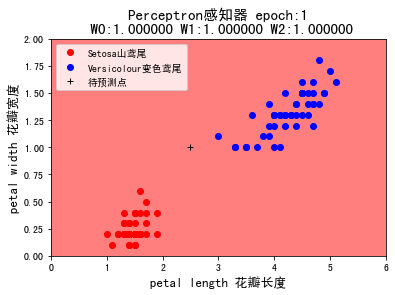

KeyboardInterrupt: 

In [25]:
# # 学习算法


#训练感知机模型
# 更新一次权值
def train():
    # 使用全局变量W
    global W
    # 同时计算100个数据的预测值
    # Y的形状为(100,1)-100行1列
    Y = np.sign(np.dot(X,W))
    # T - Y得到100个的标签值与预测值的误差E。形状为(100,1)
    E = T - Y
    # X的形状为(100,3)
    # X.T表示X的转置矩阵，形状为(3,100)
    # 我们一共有100个数据，每个数据3个特征的值。定义第i个数据的第j个特征值为xij
    # 如第1个数据，第2个值为x12
    # X.T.dot(E)为一个3行1列的数据：
    # 第1行等于：x0_0×e0+x1_0×e1+x2_0×e2+x3_0×e3+...+x99_0×e99，它会调整权值W0
    # 第2行等于：x0_1×e0+x1_1×e1+x2_1×e2+x3_1×e3+...+x99_1×e99，它会调整权值W1
    # 第3行等于：x0_2×e0+x1_2×e1+x2_2×e2+x3_2×e3+...+x99_2×e99，它会调整权值W2
    # X.shape表示X的形状X.shape[0]得到X的行数，表示有多少个数据
    # X.shape[1]得到列数，表示每个数据有多少个特征值。
    delta_W = lr * (X.T.dot(E)) / X.shape[0]
    W = W + delta_W


# # 画图函数
def draw():
    plt.clf()
    plt.xlim(0, 6)#x轴上的最小值和最大值
    plt.ylim(0, 2)#y轴上的最小值和最大值
    plt.title(u'Perceptron感知器 epoch:%d\n W0:%f W1:%f W2:%f' %(i+1,W[0],W[1],W[2]), fontsize=15)

    plt.xlabel('petal length 花瓣长度', fontsize=13)
    plt.ylabel('petal width 花瓣宽度', fontsize=13)
    plt.plot(X[:50, 1], X[:50, 2], 'bo', color='red', label='Setosa山鸢尾')
    # 用黄色的点来画出负样本
    plt.plot(X[50:100, 1], X[50:100, 2], 'bo', color='blue', label='Versicolour变色鸢尾')
    plt.plot(2.5, 1, 'b+', color='black', label='待预测点')

    k = - W[1] / W[2]
    d =  -W[0] / W[2]
    # 设定两个点
    xdata = (0,6)
    # 通过两个点来确定一条直线，用红色的线来画出分界线
    plt.plot(xdata,xdata * k + d,'black', linewidth=3)
    plt.legend()
    ######################################################以下绘制决策面两边的颜色，不要求掌握
    # 生成决策面
    from matplotlib.colors import ListedColormap #绘制决策面两边的颜色，不要求掌握
    # 生成x,y的数据
    n = 256
    xx = np.linspace(0, 6, n)
    yy = np.linspace(0, 2, n)
    # 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
    XX, YY = np.meshgrid(xx, yy)
    # 填充等高线
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(np.sign(W[0]+W[1]*XX+W[2]*YY)))])
    plt.contourf(XX, YY, np.sign(W[0]+W[1]*XX+W[2]*YY),8, alpha = 0.5, cmap=cmap)
    #######################################################以上绘制决策面两边的颜色，不要求掌握
    plt.pause(0.1)
    plt.show()


# # 训练100次
for i in range(1000):
    if(i==0):    #特地画出未经训练的初始图像，以方便理解
        draw()
        plt.pause(5)  #停留两秒，这是分类直线最初的位置，取决于W的初始值，是人为决定的超参数
    train()      #更新一次权值
    draw()       #画出更新一次权值后的图像
    Y = np.sign(np.dot(X,W))
    # .all()表示Y中的所有值跟T中所有值都对应相等，结果才为真
    if(Y == T).all():
        print('Finished')
        # 跳出循环
        break